# AE 771 | Homework \#1 | Rocket Propulsion | Ray Taghavi
### Code Written by Henry Hunt
> Disclaimer: I am working with Brendan Smith and Jack House to teach them more about Python coding. We are learning together so while some code will be similar due to our determination of the best way to format, the work is completely original between our programs.

In [249]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
%matplotlib inline

## Example 2-1 | _Page 31 of Rocket Propulsion Elements_
Determine the mass ratios for the vehicle and its propulsive unit, the propellant mass fraction
for the vehicle and for its propulsive unit, the effective exhaust velocity, and the total
impulse. Also, sensitive electronic equipment in the payload would limit the maximum acceleration
to 35 g0’s. Is this exceeded during the flight? Assume constant thrust and neglect the
short start and stop transients as well the force of gravity (which is being balanced by the lift
of aerodynamic wings).

In [250]:
#Rocket Vehicle Characteristics
Mo=200    #Mass Initial | kg
Mf=130    #Mass After Rocket Operation | kg
Mpl=110   #Mass of Payload, Nonpropulsive structure
t=3       #Rocket Operation Duration | Seconds
ΔIsp=240  #Average Specific Impulse of Propellant | Seconds
g=9.81    #Acceleration of Gravity | m/s^2
Mp=Mo-Mf  #Mass of Propellant
glim=35   #The limit of maxiumum acceleration

#Calculations
MR=Mf/Mo               #Vehicle Mass Ratio for Vehicle
MRp=(Mf-Mpl)/(Mo-Mpl)  #Vehicle Mass Ratio for Propulsive Unit
ζ=1-MR                 #Propellant Mass Fraction for Vehicle
ζp=1-MRp               #Propellant Mass Fraction for Propulsive Unit
C=ΔIsp*g               #Effective Exhaust Velocity | m/s
mdot=(Mo-Mf)/t         #Mass flowrate | kg/s
F=mdot*C               #Thrust | N
It=F*t                 #Total Impulse | N-sec
Af=F/Mf                #Final Acceleration | m/s^2
g_Af=Af/g              #The number of g's in the final acceleration

#Ouput Values
print(round(MR,2),"Mass Ratio for the Vehicle, Unitless")
print(round(MRp,2),"Mass Ratio for the Propulsive Unit, Unitless")
print(round(ζ,2),"Propellant Mass Fraction for the Vehicle, Unitless")
print(round(ζp,2),"Propellant Mass Fraction  for the Propulsive Unit, Unitless")
print(round(C,0),"Effective Exhaust Velocity, m/s")
print(round(It,0),"Total Impulse, N-Sec")
print(round(g_Af,2),"Number of Earth Surface g's at Final Acceleration , Unitless")
print("The value of",round(g_Af,2),"g's is larger than the maximum acceleration limit of",glim,"Earth surface g's.")

0.65 Mass Ratio for the Vehicle, Unitless
0.22 Mass Ratio for the Propulsive Unit, Unitless
0.35 Propellant Mass Fraction for the Vehicle, Unitless
0.78 Propellant Mass Fraction  for the Propulsive Unit, Unitless
2354.0 Effective Exhaust Velocity, m/s
164808.0 Total Impulse, N-Sec
43.08 Number of Earth Surface g's at Final Acceleration , Unitless
The value of 43.08 g's is larger than the maximum acceleration limit of 35 Earth surface g's.


## Example 2-2 | _Page 34 of Rocket Propulsion Elements_
Determine ṁ , 𝑣2, c∗, and c at sea level. Also, determine the pressure thrust (Eq. 2–13) and
the specific impulse at sea level, 1000 m, and 25,000 m altitude. Assume that the momentum
thrust is invariant during the rocket ascent, and that start and stop transients can be neglected.

In [251]:
#Initial Variables
tb=40                  #Burn Duration | Sec
Mo=1210                #Initial Propulsion System Mass | kg
Mf=215                 #Mass of Rocket Motor After Test | kg
F=62250                #Sea-Level Thrust | N
P1=7000000             #Chamber Pressure | Pa
P2=70000               #Nozzle Exit Pressure | Pa
Dt=8.55                #Nozzle Throat Diameter | cm
D2=27.03               #Nozzle Exit Diameter | cm
g=9.81                 #Acceleration of Gravity | m/s^2
p3=[101320,89880,2550] #Ambient Pressure Input | Pa

#Static Calculations
At=np.pi*(Dt/100)**2/4 #Calulating the area of the throat | m^2
A2=np.pi*(D2/100)**2/4 #Calulating the area of the nozzle | m^2
Alt=["Sea-Level", "1000 m", "25,000 m"]
mdot=(Mo-Mf)/tb        #Mass Flow Rate | kg/s^2
Cstar=P1*At/mdot       #Characteristic Exhaust Velocity | m/s
C=F/mdot               #Effective Exhaust Velocity | m/s

#Dynamic Calculations
for i in range(len(p3)):
    P3=p3[i]           #Iterating through pressures
    Al=Alt[i]          #Iterating through altitudes
    Fp=(P2-P3)*A2      #Pressure Thrust | N
   
    if P3 == 101320:
        V2=(F-Fp)/mdot # Nozzle Exit Velocity | m/s
        print(round(mdot,2),"Mass Flowrate at",Al,"in kg/s")
        print(round(V2,2),"Nozzle Exit Velocity at",Al,"in m/s")
        print(round(Cstar,6),"Characteristic Exhaust Velocity at ",Al,"in m/s")
        print(round(C,6),"Effective Exhaust Velocity at",Al,"in m/s")
        print(" ")
    
    F=mdot*V2+Fp
    Isp=F/(mdot*g) # Isp | s
    print(round(P3/1000,2),"Ambient Pressure at",Al,"in KPa")
    print(round(Fp,0),"Pressure Thrust at",Al,"in N")
    print(round(Isp,0),"Isp at",Al,"in seconds")
    print(" ")

24.88 Mass Flowrate at Sea-Level in kg/s
2574.76 Nozzle Exit Velocity at Sea-Level in m/s
1615.686371 Characteristic Exhaust Velocity at  Sea-Level in m/s
2502.512563 Effective Exhaust Velocity at Sea-Level in m/s
 
101.32 Ambient Pressure at Sea-Level in KPa
-1797.0 Pressure Thrust at Sea-Level in N
255.0 Isp at Sea-Level in seconds
 
89.88 Ambient Pressure at 1000 m in KPa
-1141.0 Pressure Thrust at 1000 m in N
258.0 Isp at 1000 m in seconds
 
2.55 Ambient Pressure at 25,000 m in KPa
3870.0 Pressure Thrust at 25,000 m in N
278.0 Isp at 25,000 m in seconds
 


## Homework 3 | Provided as a handout
Plot the variation of thrust and specific impulse againt altitude. Use atmospheric pressure from the text appendix.

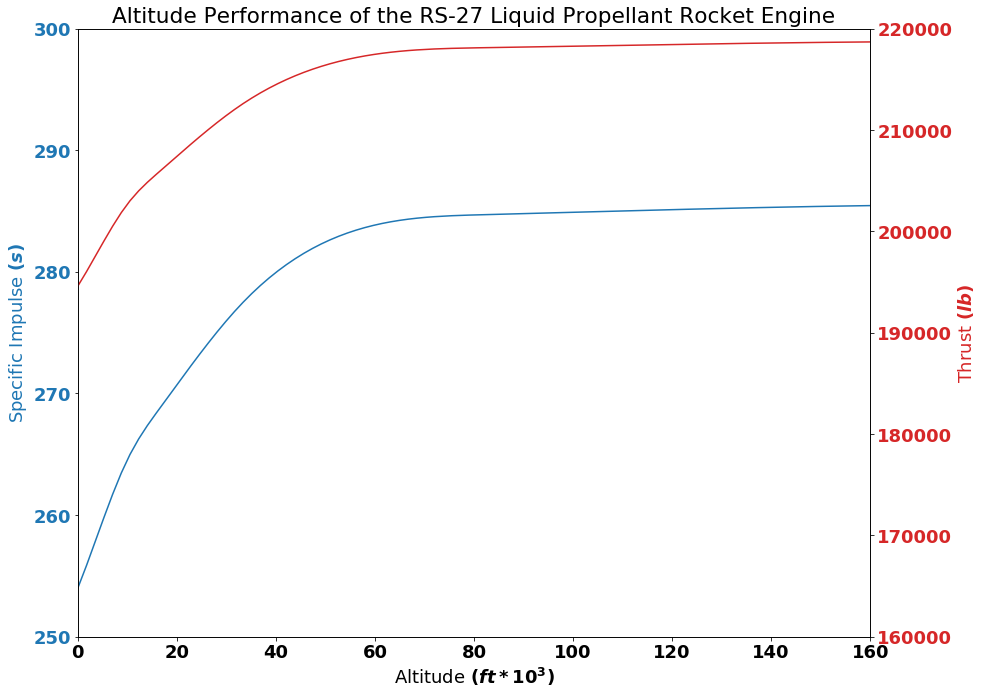

In [252]:
#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=300 #Resoultion of the calulations

#Editing Font Size for Plot
font = {'size'   : 18}
matplotlib.rc('font', **font)

#Initial Variables
P2=8.66                  #Pressure | psia (Remains constant with altitude)
F=194600                 #Sea-Level Thrust | lbs
Isp=254                  #Sea-Level Specific Impulse | Seconds
A2=1642                  #Area | inches^2
g=32.2                   #Force of Gravity | ft/s^2
P3=14.696                #Sea-Level Pressure | psia

#Calculations
C=Isp*g                  #C is assumed to be equal to V2 with the units of ft/s
mdot=F/C                 #Mass Flow Rate
wdot=mdot*g              #Weight Flow Rate
V2=(F-((P2-P3)*A2))/mdot #At sea level, using F, mdot, p2, p3, A2.

#Altitude Data | Sourced from page 747 of Rocket Propulsion Elements
P3=P3*np.array([1,8.87*10**-1,6.6919*10**-1,5.3313*10**-1,2.6151*10**-1,2.5158*10**-2,7.8735*10**-4,2.0408*10**-5,3.1593*10**-7,1.2341*10**-8,2.9997*10**-9])
Alt=3280.84*np.array([0,1,3,5,10,25,50,75,100,130,160])

#Primary Equations
F=mdot*V2+(P2-P3)*A2     #Thrust of a Rocket | lbs
Isp=F/wdot               #Derived Isp Equation | seconds

#Smoothing the Data
Alt_ = np.linspace(Alt.min(), Alt.max(), Res) 
FNew = make_interp_spline(Alt, F, k=3)
IspNew = make_interp_spline(Alt, Isp, k=3)
F_s = FNew(Alt_)
Isp_s = IspNew(Alt_)
Alt_=Alt_/1000

#Plotting Isp
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel("Altitude $(ft*10^3)$")
ax1.set_ylabel("Specific Impulse $(s)$", color=color)
ax1.plot(Alt_,Isp_s,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([250, 300])
plt.xlabel("Altitude $(ft*10^3)$")
ax2 = ax1.twinx()  # Creating a second axis in the plot that shares the x-axis

#Plotting Thrust
color = 'tab:red'
ax2.set_ylabel("Thrust $(lb)$", color=color)  # we already handled the x-label with ax1
ax2.plot(Alt_,F_s,color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([160000, 220000])
plt.xlim(0,160)     #Setting the range for the x-axis
plt.title("Altitude Performance of the RS-27 Liquid Propellant Rocket Engine")
fig.tight_layout()  #Setting a layout to ensure no clipping of variable names
plt.show()          #Printing the plot